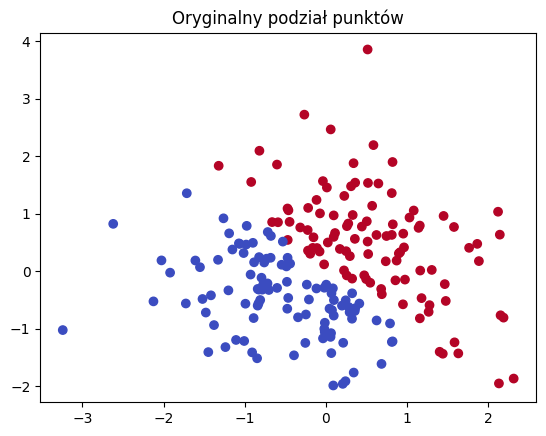

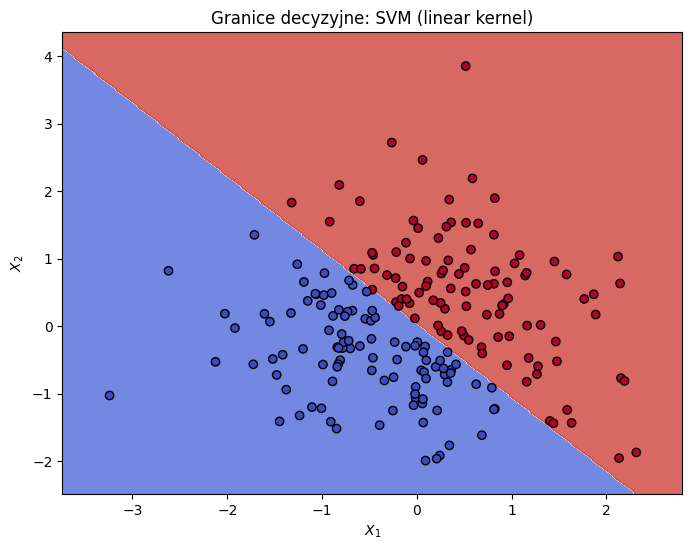

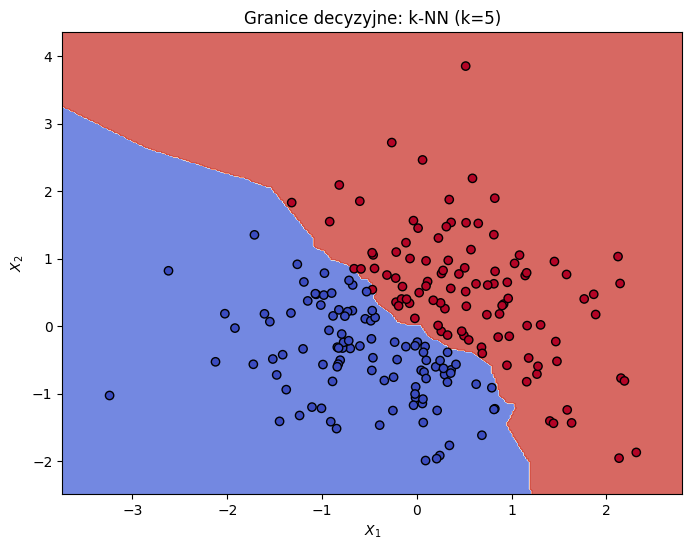

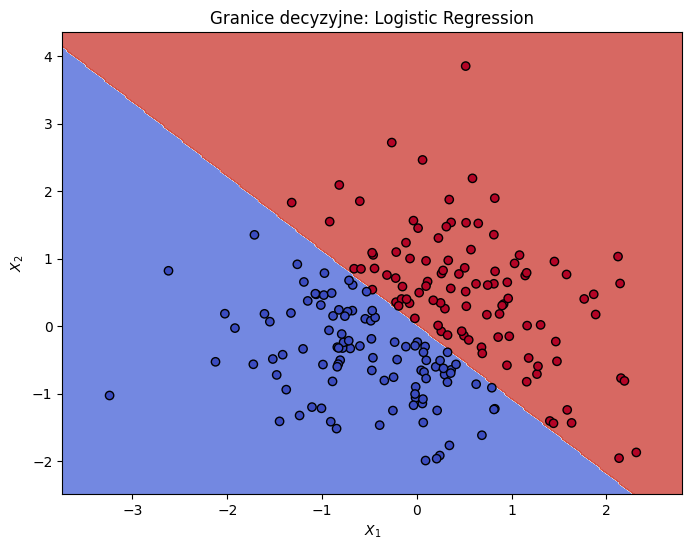

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generowanie danych
np.random.seed(42)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Oryginalny podział punktów")
plt.show()

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definicja modeli
models = {
    "SVM (linear kernel)": SVC(kernel='linear'),
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression()
}

# Parametry siatki do rysowania granic decyzyjnych
h = .02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, (name, clf) in enumerate(models.items()):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # Regiony decyzyjne
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.title(f'Granice decyzyjne: {name}')
    plt.show()